<a href="https://colab.research.google.com/github/lukyg/GoFood_Indonesia/blob/main/Indonesia_Food_Delivery_(GoFood).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Studi Case : Indonesia Food Delivery (GoFood)

Perkembangan pesat dalam industri layanan makanan online telah menyebabkan perubahan signifikan dalam perilaku konsumen dalam memesan makanan melalui aplikasi seperti GoFood. Sebagai salah satu brand yang beroperasi di platform ini, Holland Bakery perlu memahami dinamika penjualan di berbagai merchant area seperti Jakarta, Medan, dan Surabaya. Meskipun memiliki performa yang baik secara keseluruhan, terdapat perbedaan signifikan dalam posisi penjualan dan produk terlaris di setiap area. Hal ini menunjukkan adanya tantangan dalam mengoptimalkan strategi pemasaran dan penjualan untuk masing-masing lokasi. Dengan demikian, analisis mendalam terhadap data penjualan Holland Bakery diperlukan untuk mengidentifikasi area dengan performa terbaik dan terendah, memahami produk yang paling diminati, serta mengembangkan strategi bisnis yang lebih efektif untuk meningkatkan hasil penjualan di seluruh merchant area.

## Data Overview

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [147]:
df = pd.read_csv('/content/drive/MyDrive/Collab Dataset/Case Study Chapter 3 Topic 1_ Dataset Gofood.csv',)

In [148]:
df.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,description
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,NaN,0,Sajian Susu Coklat Milo Plus Espresso Dengan R...


In [149]:
df.sample(5)

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,description
30483,"Aneka Bothok, Sukolilo",surabaya,Aneka nasi,Lauk Pauk,Ayam Goreng,6000.0,NaN,0,NaN
14179,Ahmeds Kitchen,medan,Ayam & bebek/Aneka nasi/India,Minuman,Teh Manis Dingin,7000.0,NaN,0,NaN
20533,Jp Coffee,medan,Aneka nasi/Jajanan/Minuman,Minuman,Capuccino,15000.0,NaN,0,"Coffee Bean, Fresh Milk"
4817,"Kancha, Duri Kosambi",jakarta,Minuman,Klasik Mambo,Jazz Mambo Large,13000.0,NaN,0,Segar Dan Uniknya Ice Blended Dari Jasmine Gre...
32039,"Cendrawasih Kopi, Rest Area Aloha",surabaya,Minuman/Kopi/Sate,"Minuman, Makanan, Kopi,",Hot Lychee Tea,14000.0,NaN,0,Hot tea yang didalamnya ada buah lecy yang legit


In [150]:
df.shape

(45195, 9)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45195 entries, 0 to 45194
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   merchant_name   45195 non-null  object 
 1   merchant_area   45195 non-null  object 
 2   category        45195 non-null  object 
 3   display         45195 non-null  object 
 4   product         45195 non-null  object 
 5   price           45195 non-null  float64
 6   discount_price  2738 non-null   float64
 7   isDiscount      45195 non-null  int64  
 8   description     21720 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


In [152]:
df.isnull().sum()

merchant_name         0
merchant_area         0
category              0
display               0
product               0
price                 0
discount_price    42457
isDiscount            0
description       23475
dtype: int64

## Preprocessing

Karena nilai discount_price bernilai null sedangkan nilai sebenarnya 0 (karena tidak terdapat diskon), sehingga dilakukan pengecekan terlebih dahulu.

In [153]:
df_disc = df['isDiscount'] == 0
df_disc

0        True
1        True
2        True
3        True
4        True
         ... 
45190    True
45191    True
45192    True
45193    True
45194    True
Name: isDiscount, Length: 45195, dtype: bool

In [154]:
df_disc.value_counts()

isDiscount
True     42457
False     2738
Name: count, dtype: int64

In [155]:
df['discount_price'].fillna(0, inplace=True)

In [156]:
df

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,description
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,0.0,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,0.0,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,0.0,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,0.0,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,0.0,0,Sajian Susu Coklat Milo Plus Espresso Dengan R...
...,...,...,...,...,...,...,...,...,...
45190,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Hazelnut Choco Milktea,70000.0,0.0,0,1L Hazelnut Choco Milktea
45191,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Dolce Latte,80000.0,0.0,0,1L Dolce Latte
45192,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Chocoffe,80000.0,0.0,0,1L Chocoffe
45193,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Kopi Susu Gula Aren,85000.0,0.0,0,1L Kopi Susu Gula Aren


In [157]:
df = df.drop('description', axis=1)
df

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,0.0,0
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,0.0,0
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,0.0,0
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,0.0,0
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,0.0,0
...,...,...,...,...,...,...,...,...
45190,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Hazelnut Choco Milktea,70000.0,0.0,0
45191,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Dolce Latte,80000.0,0.0,0
45192,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Chocoffe,80000.0,0.0,0
45193,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Kopi Susu Gula Aren,85000.0,0.0,0


In [158]:
print(df.category.value_counts())

category
Roti                                  4308
Jajanan                               1964
Aneka nasi                            1940
Minuman                               1375
Cepat saji                            1092
                                      ... 
Aneka nasi/Bakso & soto/Cepat saji       8
Jepang/Cepat saji/Barat                  7
Jajanan/Cepat saji/Chinese               6
Barat/Jajanan/Ayam & bebek               4
Cepat saji/Aneka nasi/Chinese            3
Name: count, Length: 333, dtype: int64


In [159]:
df.isnull().sum()

merchant_name     0
merchant_area     0
category          0
display           0
product           0
price             0
discount_price    0
isDiscount        0
dtype: int64

In [160]:
df.dtypes

merchant_name      object
merchant_area      object
category           object
display            object
product            object
price             float64
discount_price    float64
isDiscount          int64
dtype: object

### Merubah string dan karakter

In [161]:
df[['brand', 'location']] = df['merchant_name'].str.split(',', expand=True, n=2)

In [162]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [163]:
df

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,brand,location
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,0.0,0,330 Kopi,Ciledug
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,0.0,0,330 Kopi,Ciledug
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,0.0,0,330 Kopi,Ciledug
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,0.0,0,330 Kopi,Ciledug
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,0.0,0,330 Kopi,Ciledug
...,...,...,...,...,...,...,...,...,...,...
45190,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Hazelnut Choco Milktea,70000.0,0.0,0,Zeger!,Sidoarjo
45191,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Dolce Latte,80000.0,0.0,0,Zeger!,Sidoarjo
45192,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Chocoffe,80000.0,0.0,0,Zeger!,Sidoarjo
45193,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Kopi Susu Gula Aren,85000.0,0.0,0,Zeger!,Sidoarjo


In [164]:
df['brand'] = df['brand'].str.replace(r'[^\w\s]+','', regex=True)
df['display'] = df['display'].str.replace(r'[^\w\s]+','', regex=True)
df

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,brand,location
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,0.0,0,330 Kopi,Ciledug
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,0.0,0,330 Kopi,Ciledug
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,0.0,0,330 Kopi,Ciledug
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,0.0,0,330 Kopi,Ciledug
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,0.0,0,330 Kopi,Ciledug
...,...,...,...,...,...,...,...,...,...,...
45190,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET,1L Hazelnut Choco Milktea,70000.0,0.0,0,Zeger,Sidoarjo
45191,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET,1L Dolce Latte,80000.0,0.0,0,Zeger,Sidoarjo
45192,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET,1L Chocoffe,80000.0,0.0,0,Zeger,Sidoarjo
45193,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET,1L Kopi Susu Gula Aren,85000.0,0.0,0,Zeger,Sidoarjo


In [165]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,brand,location
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,0.0,0,330 Kopi,Ciledug
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,0.0,0,330 Kopi,Ciledug
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,0.0,0,330 Kopi,Ciledug
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,0.0,0,330 Kopi,Ciledug
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,0.0,0,330 Kopi,Ciledug
...,...,...,...,...,...,...,...,...,...,...
45190,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET,1L Hazelnut Choco Milktea,70000.0,0.0,0,Zeger,Sidoarjo
45191,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET,1L Dolce Latte,80000.0,0.0,0,Zeger,Sidoarjo
45192,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET,1L Chocoffe,80000.0,0.0,0,Zeger,Sidoarjo
45193,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET,1L Kopi Susu Gula Aren,85000.0,0.0,0,Zeger,Sidoarjo


In [166]:
df = df.drop('merchant_name', axis=1)
df

,merchant_area,category,display,product,price,discount_price,isDiscount,brand,location
0,jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,0.0,0,330 Kopi,Ciledug
1,jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,0.0,0,330 Kopi,Ciledug
2,jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,0.0,0,330 Kopi,Ciledug
3,jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,0.0,0,330 Kopi,Ciledug
4,jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,0.0,0,330 Kopi,Ciledug
...,...,...,...,...,...,...,...,...,...
45190,surabaya,Minuman/Kopi,1L ZEGER BANGET,1L Hazelnut Choco Milktea,70000.0,0.0,0,Zeger,Sidoarjo
45191,surabaya,Minuman/Kopi,1L ZEGER BANGET,1L Dolce Latte,80000.0,0.0,0,Zeger,Sidoarjo
45192,surabaya,Minuman/Kopi,1L ZEGER BANGET,1L Chocoffe,80000.0,0.0,0,Zeger,Sidoarjo
45193,surabaya,Minuman/Kopi,1L ZEGER BANGET,1L Kopi Susu Gula Aren,85000.0,0.0,0,Zeger,Sidoarjo


In [167]:
df.dtypes

merchant_area      object
category           object
display            object
product            object
price             float64
discount_price    float64
isDiscount          int64
brand              object
location           object
dtype: object

## EDA (Exploratory Data Analysis)

### Revenue by Merchant Area

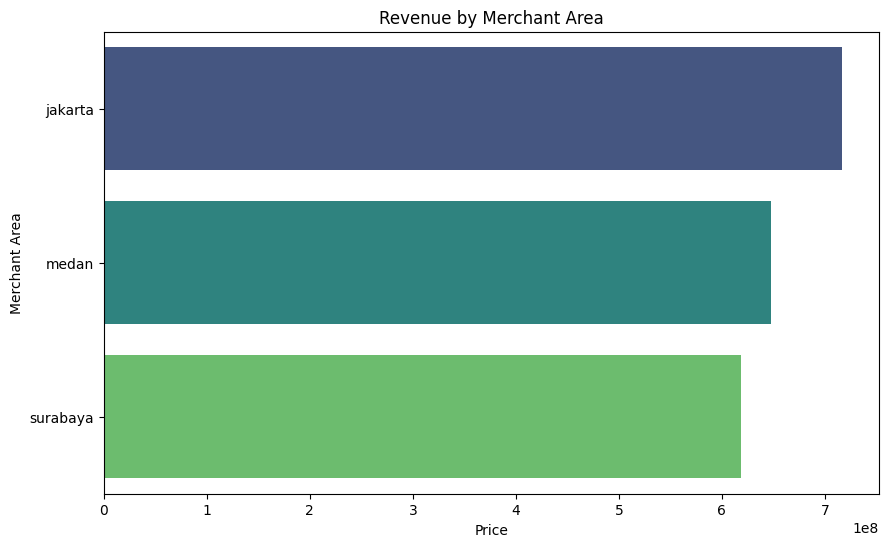

In [168]:
dftotal = df.groupby(['merchant_area']).sum().sort_values(by='price', ascending=False)
dftotal = dftotal.reset_index()

num_bars = len(dftotal)
palette = sns.color_palette("viridis", num_bars)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x="price", y="merchant_area", data=dftotal, palette=palette)
plt.title("Revenue by Merchant Area")
plt.xlabel("Price")
plt.ylabel("Merchant Area")
plt.show()

### TOP 10 Brand by Revenue

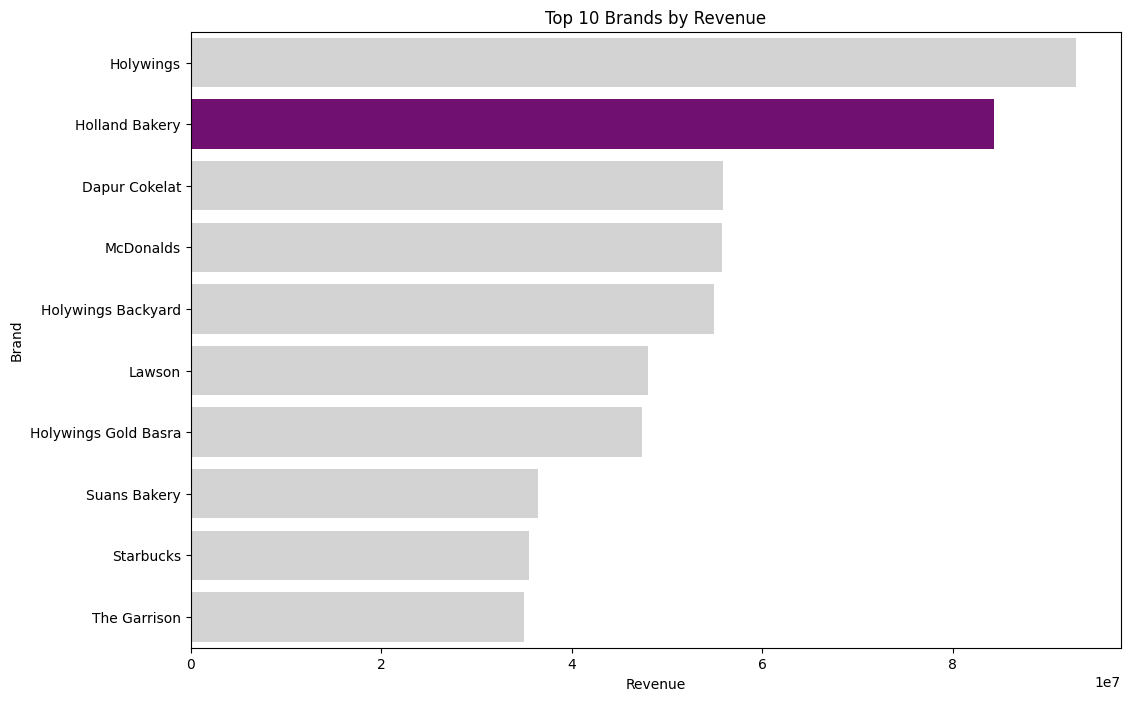

In [169]:
brand_revenue = df.groupby('brand')['price'].sum().reset_index()

top_brands = brand_revenue.sort_values(by='price', ascending=False).head(10)

highlight_brand = 'Holland Bakery'
highlight_color = 'purple'
default_color = 'lightgray'

palette = [highlight_color if brand == highlight_brand else default_color for brand in top_brands['brand']]

plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='brand', data=top_brands, palette=palette)
plt.title("Top 10 Brands by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Brand")
plt.show()

### TOP 10 Brand by Revenue in Jakarta

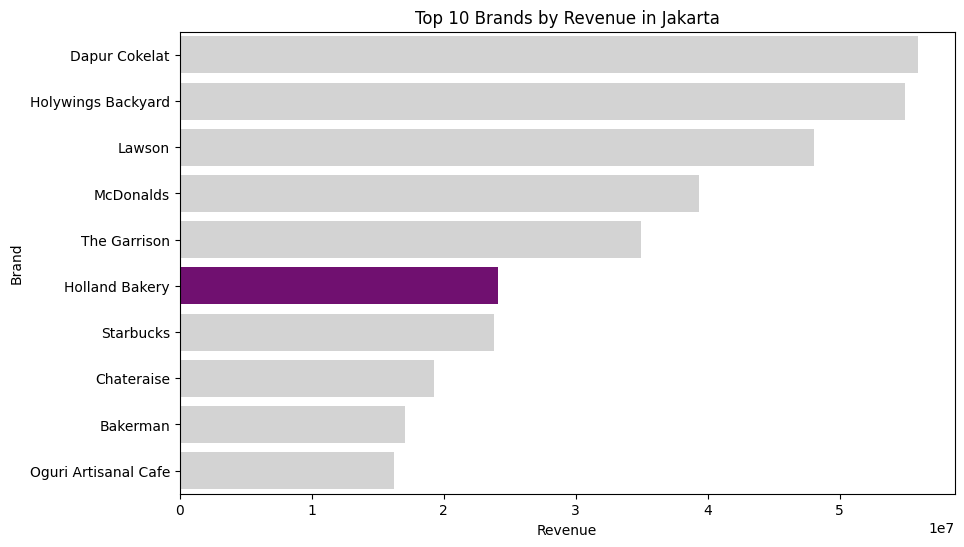

In [170]:
df_jakarta = df[df['merchant_area'] == 'jakarta']

df_jakarta['revenue'] = df_jakarta['price']

brand_revenue = df_jakarta.groupby('brand')['revenue'].sum().reset_index()

top_brands = brand_revenue.sort_values(by='revenue', ascending=False).head(10)

highlight_brand = 'Holland Bakery'
highlight_color = 'purple'
default_color = 'lightgrey'

palette = [highlight_color if brand == highlight_brand else default_color for brand in top_brands['brand']]

plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='brand', data=top_brands, palette=palette)
plt.title('Top 10 Brands by Revenue in Jakarta')
plt.xlabel('Revenue')
plt.ylabel('Brand')
plt.show()

### TOP 10 Brand by Revenue in Surabaya

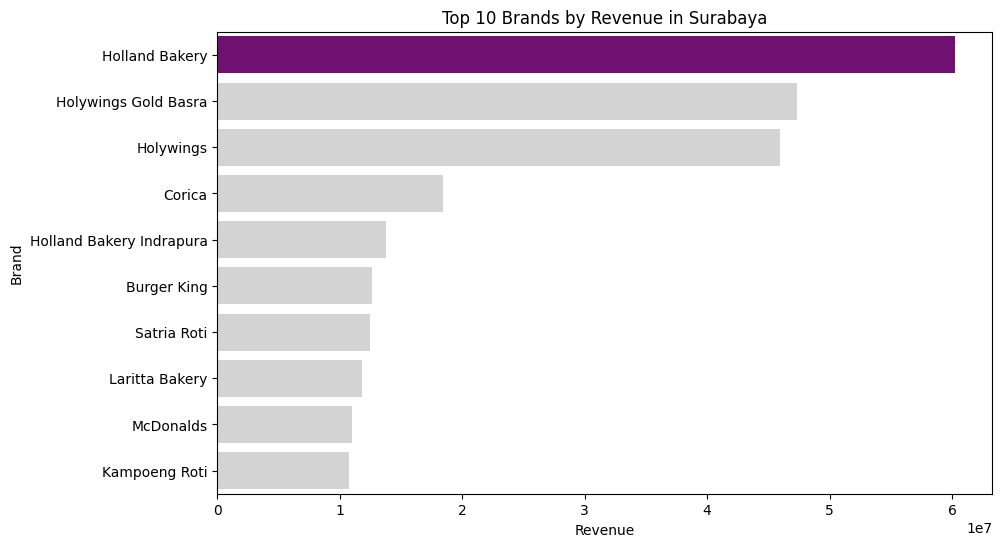

In [171]:
df_surabaya = df[df['merchant_area'] == 'surabaya']

df_surabaya['revenue'] = df_surabaya['price']

brand_revenue = df_surabaya.groupby('brand')['revenue'].sum().reset_index()

top_brands = brand_revenue.sort_values(by='revenue', ascending=False).head(10)

highlight_brand = 'Holland Bakery'
highlight_color = 'purple'
default_color = 'lightgrey'

palette = [highlight_color if brand == highlight_brand else default_color for brand in top_brands['brand']]

plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='brand', data=top_brands, palette=palette)
plt.title('Top 10 Brands by Revenue in Surabaya')
plt.xlabel('Revenue')
plt.ylabel('Brand')
plt.show()

### Top 5 Products by Revenue for Holland Bakery in Jakarta and Surabaya

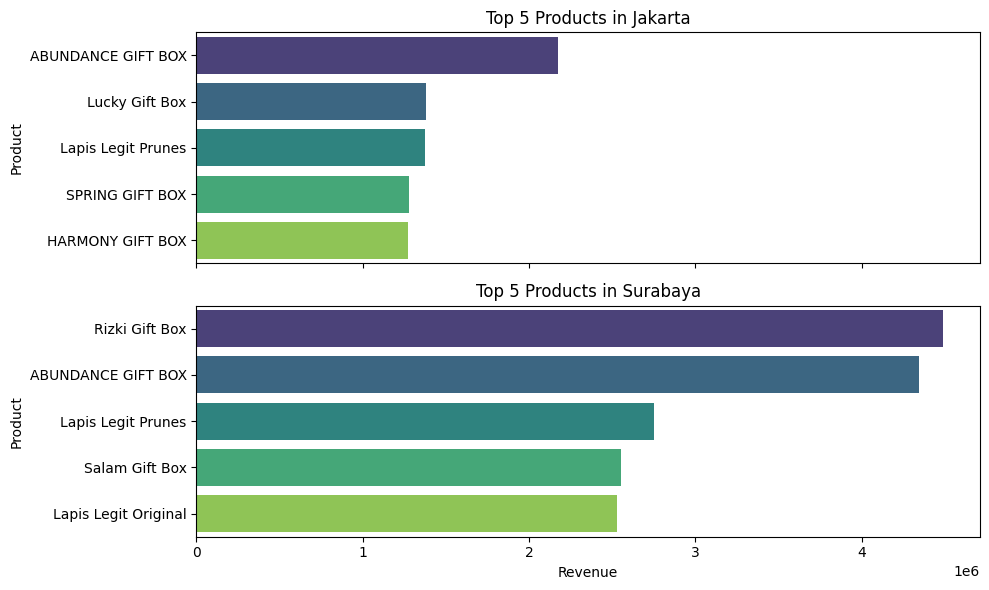

In [172]:
areas = ['jakarta','surabaya']

fig, axes = plt.subplots(nrows=len(areas), ncols=1, figsize=(10, 6), sharex=True)

for ax, area in zip(axes, areas):
    df_area = df[(df['merchant_area'] == area) & (df['brand'] == 'Holland Bakery')]

    df_area['revenue'] = df_area['price']
    product_revenue = df_area.groupby('product')['revenue'].sum().reset_index()

    top_5_products = product_revenue.sort_values(by='revenue', ascending=False).head(5)

    sns.barplot(x='revenue', y='product', data=top_5_products, palette='viridis', ax=ax)
    ax.set_title(f'Top 5 Products in {area.capitalize()}')
    ax.set_xlabel('Revenue')
    ax.set_ylabel('Product')

plt.tight_layout()
plt.show()

Hasil analisa pembelian produk melalui GoFood sebagai berikut.
* Dari ketiga merchant area, antara jakarta, medan dan surabaya, jakarta memiliki penjualan tertinggi. Sedangkan medan belum menjadi daerah pasar Holland Bakery.
* Dari dari semua brand yang ada, Holywings berada di posisi penjualan tertinggi. Yang ingin disorot di sini adalah Holand Bakery dengan posisi kedua.
* Di Jakarta, Holland Bakery berada di posisi ke-6, sedangkan di Surabaya berada di posisi pertama.
* Dari 5 produk terlaris Holland Bakery di masing-masing area didominasi oleh Gift Box, asumsi bahwa di Jakarta dan Surabaya sebagian besar pelanggan membeli untuk hari raya atau perkantoran untuk acara perpisahan.

## Rekomendasi

* Di Jakarta, fokuskan kampanye pemasaran pada Holland Bakery untuk meningkatkan jangkauan pasar. Kemudian, mempertimbangkan diskon khusus atau promosi untuk produk seperti Gift Box, terutama menjelang hari raya atau acara perpisahan.

* Di Medan, perlu dilakukan riset pasar untuk memaksimalkan potensi yang ada di sana. Misalnya dimulai dengan memahami kebiasaan konsumen, segmen pasar, kompetitor lokal, kustomisasi produk, kampanye pemasaran dan diskon serta promosi.

3. Di Surabaya, Holland Bakery memiliki posisi yang kuat, sehingga perlu memanfaatkan posisi ini dengan meningkatkan promosi di Surabaya. Perkenalkan produk baru atau penawaran bundling yang melibatkan Gift Box untuk memperkuat posisi pasar.

4. Bila dilihat dari produk terlaris, Gift Box adalah produk yang dominan di Jakarta dan Surabaya.Untuk meningkatkan penjualan, pertimbangkan untuk memperkenalkan variasi Gift Box atau kemasan khusus untuk hari raya dan acara perpisahan. Pada periode tersebut juga perlu dilakukan promosi dan diskon.